# Unsupervised Learning-Clustering Countries

#### Notebook has following sections:

>1-Data cleaning

>2-Principal Component Analysis(PCA)-Dimensionality Reduction

>3-Outlier Analyis

>4-KMeans Clustering

>5-Hierarchical clustering

In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#read data 

cnt = pd.read_csv('Country-data.csv')
cnt.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Data Cleaning 

In [3]:
cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


In [4]:
#check missing values

cnt.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
#Columns such as export, import and health are in Percentage
#converting the percentage value to actual values

cnt['exports']=(cnt['exports']*cnt['gdpp'])/100
cnt['health']=(cnt['health']*cnt['gdpp'])/100
cnt['imports']=(cnt['imports']*cnt['gdpp'])/100

In [6]:
cnt.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [7]:
#Droping country column for model building 

cnt_num=cnt.drop('country',axis=1)
cnt_num.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [8]:
cnt_num.shape

(167, 9)

# Principal Component Analysis[PCA]

### Standardising 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_cnt=scaler.fit_transform(cnt_num)

In [10]:
#Principal Component Analysis for dimensionality reduction

from sklearn.decomposition import PCA
pca=PCA(svd_solver='randomized',random_state=42)
pca.fit(scaled_cnt)

PCA(random_state=42, svd_solver='randomized')

In [11]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [12]:
#explained_variance_ratio

pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

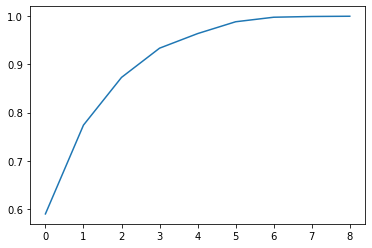

In [13]:
#plot for explained_variance_ratio 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

selected n_components=3

In [14]:
#training the model

from sklearn.decomposition import IncrementalPCA
pca_final=PCA(n_components=3)
cnt_train_pca= pca_final.fit_transform(scaled_cnt)

In [15]:
cnt_train_pca.shape

(167, 3)

In [16]:
# Transpose the train set data 

PC= np.transpose(cnt_train_pca)
PC

array([[-2.63557499e+00, -2.42055643e-02, -4.59557398e-01,
        -2.72263028e+00,  6.48597043e-01,  3.54221548e-02,
        -3.34554724e-01,  3.18152480e+00,  3.81685715e+00,
        -4.67994708e-01,  1.49896170e+00,  1.47088772e+00,
        -1.01516655e+00,  8.44165717e-01, -1.50192243e-02,
         3.96165209e+00, -4.03885263e-01, -2.36396201e+00,
        -7.16047998e-01, -1.01877707e+00,  2.50743177e-01,
        -1.12948907e+00,  1.65169993e-01,  2.69707911e+00,
         2.79292646e-01, -2.75148004e+00, -2.76243995e+00,
        -1.17965396e+00, -2.43892330e+00,  3.39523415e+00,
        -5.24475038e-01, -3.23694559e+00, -3.18539522e+00,
         6.90650603e-01, -1.30696482e-01, -1.55448767e-02,
        -1.94913029e+00, -3.11493019e+00, -2.04734314e+00,
         4.29282147e-01, -2.57219502e+00,  8.45147825e-01,
         2.31333607e+00,  1.67399330e+00,  4.37790595e+00,
        -3.68925556e-01, -3.04457221e-01, -8.37748859e-01,
        -3.38219520e-01, -1.05254165e+00, -1.94833895e+0

In [17]:
PC.shape

(3, 167)

In [18]:
#listing the country names

country_names = list( cnt['country'])
country_names

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Ita

In [19]:
#create dataframe 

pc_cnt= pd.DataFrame({'country': country_names, 'PC1': PC[0], 'PC2': PC[1], 'PC3':PC[2]})
pc_cnt.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.635575,1.472267,-0.549489
1,Albania,-0.024206,-1.429892,-0.014123
2,Algeria,-0.459557,-0.675495,0.959355
3,Angola,-2.722630,2.172332,0.600215
4,Antigua and Barbuda,0.648597,-1.023437,-0.257430


## Outlier Analysis

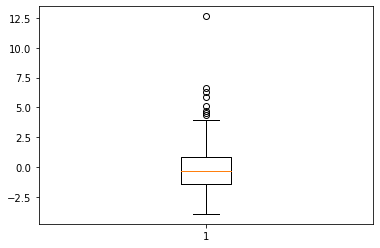

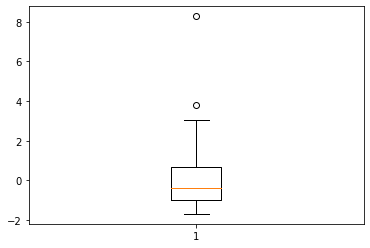

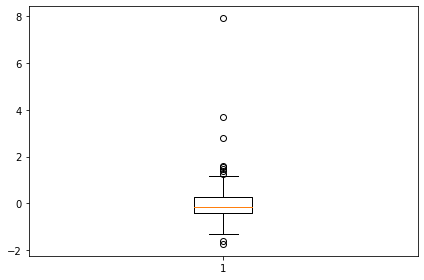

In [20]:
# box plot to check outliers for PC1, PC2, PC3
plt.subplots(0,0)
plt.boxplot(pc_cnt['PC1'])

plt.subplots(0,1)
plt.boxplot(pc_cnt['PC2'])

plt.subplots(0,2)
plt.boxplot(pc_cnt['PC3'])

plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0xea75250>,
 'caps': [<matplotlib.lines.Line2D at 0xea755b0>,
 'boxes': [<matplotlib.lines.Line2D at 0xea750a0>],
 'medians': [<matplotlib.lines.Line2D at 0xea75910>],
 'fliers': [<matplotlib.lines.Line2D at 0xea75a90>],
 'means': []}

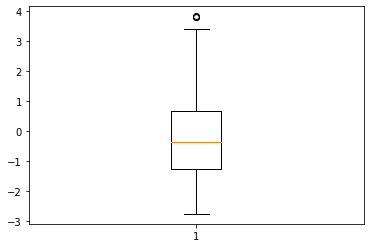

In [21]:
#there are many outliers for PC1
#to remove outliers PC1

Q1= pc_cnt.PC1.quantile(0.05)
Q3= pc_cnt.PC1.quantile(0.95)
IQR= Q3-Q1
pc_cnt=pc_cnt[(pc_cnt.PC1 >=Q1)&(pc_cnt.PC1 <=Q3)]
plt.boxplot(pc_cnt.PC1)

{'whiskers': [<matplotlib.lines.Line2D at 0xeaa6958>,
 'caps': [<matplotlib.lines.Line2D at 0xeaa6cb8>,
 'boxes': [<matplotlib.lines.Line2D at 0xeaa67a8>],
 'medians': [<matplotlib.lines.Line2D at 0xeab2040>],
 'fliers': [<matplotlib.lines.Line2D at 0xeab21c0>],
 'means': []}

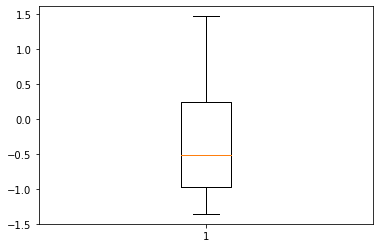

In [22]:
#there are many outliers for PC2
#to remove outliers PC2

Q1= pc_cnt.PC2.quantile(0.05)
Q3= pc_cnt.PC2.quantile(0.95)
IQR= Q3-Q1
pc_cnt=pc_cnt[(pc_cnt.PC2 >=Q1)&(pc_cnt.PC2 <=Q3)]
plt.boxplot(pc_cnt.PC2)

{'whiskers': [<matplotlib.lines.Line2D at 0xeae0430>,
 'caps': [<matplotlib.lines.Line2D at 0xeae0790>,
 'boxes': [<matplotlib.lines.Line2D at 0xeae0280>],
 'medians': [<matplotlib.lines.Line2D at 0xeae0af0>],
 'fliers': [<matplotlib.lines.Line2D at 0xeae0c70>],
 'means': []}

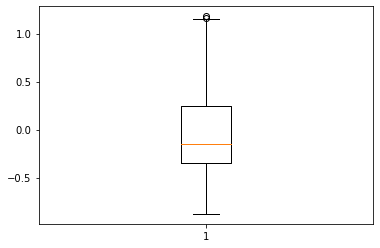

In [23]:
#there are many outliers for PC3
#to remove outliers PC3

Q1= pc_cnt.PC3.quantile(0.05)
Q3= pc_cnt.PC3.quantile(0.95)
IQR= Q3-Q1
pc_cnt=pc_cnt[(pc_cnt.PC3 >=Q1)&(pc_cnt.PC3 <=Q3)]
plt.boxplot(pc_cnt.PC3)

In [56]:
pc_cnt.shape

(119, 4)

In [57]:
pc_cnt_1=pc_cnt
pc_cnt_scaled=scaler.fit_transform(pc_cnt_1.drop('country',axis=1))

In [58]:
pc_cnt_scaled

array([[-1.69417921e+00,  2.76491950e+00, -1.07642997e+00],
       [-3.35822458e-01, -3.58763080e-01,  2.02205124e+00],
       [ 3.55931633e-01, -8.64805230e-01, -4.76673428e-01],
       [-2.57790815e-01, -1.22615201e+00,  4.43303816e-01],
       [ 1.93708591e+00,  2.41915183e-01, -2.16777113e-01],
       [ 2.33368564e+00,  9.84886879e-01, -4.79815615e-01],
       [-3.41089362e-01, -9.28814359e-02,  1.30443025e+00],
       [ 8.86763085e-01, -1.18193006e-03, -1.06627387e+00],
       [ 8.69238186e-01,  1.45284682e-01,  8.67840897e-01],
       [-6.82655795e-01, -4.07117740e-01, -1.57114559e-01],
       [ 4.78013380e-01, -8.42175098e-01, -7.91125488e-01],
       [-5.83240432e-02, -8.02517063e-01,  1.88458640e+00],
       [-3.01069696e-01, -7.11560351e-01, -9.86464960e-01],
       [-4.95934094e-01, -4.89819912e-01, -2.06723813e-01],
       [-6.84909628e-01,  5.66265663e-03,  1.64023960e-01],
       [-7.54020461e-01,  1.20776915e+00, -4.24439587e-01],
       [ 5.41572353e-02, -8.59072072e-01

# KMeans Clustering 

In [59]:
#silhouette_score

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sse=[]
for k in range (2,10):
    kmeans=KMeans(n_clusters=k).fit(pc_cnt_scaled)
    sse.append([k,silhouette_score(pc_cnt_scaled,kmeans.labels_)])  

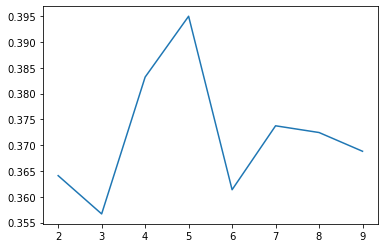

In [60]:
#plot silhouette_score for each K value 

plt.plot(pd.DataFrame(sse)[0],pd.DataFrame(sse)[1]);

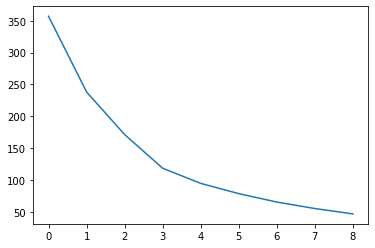

In [61]:
#elbow plot

ssd=[]
for num_cluster in list(range(1,10)):
    model_clus= KMeans(n_clusters =num_cluster,max_iter=50)
    model_clus.fit(pc_cnt_scaled)
    ssd.append(model_clus.inertia_)
plt.plot(ssd)

In [62]:
#fit with n_cluster 5

model_clus_5= KMeans(n_clusters=5,max_iter=50)
model_clus_5.fit(pc_cnt_scaled)

KMeans(max_iter=50, n_clusters=5)

In [64]:
PC_cnt_2=pc_cnt_1
PC_cnt_2.index=pd.RangeIndex(len(PC_cnt_2.index))
PC_cnt_2.head()

In [77]:
cnt_km=pd.concat([PC_cnt_2,pd.Series(model_clus_5.labels_)],axis=1)
cnt_km.columns=['country','PC1','PC2','PC3','Cluster_ID']
cnt_km

,country,PC1,PC2,PC3,Cluster_ID
0,Afghanistan,-2.635575,1.472267,-0.549489,2
1,Algeria,-0.459557,-0.675495,0.959355,0
2,Antigua and Barbuda,0.648597,-1.023437,-0.257430,4
3,Armenia,-0.334555,-1.271889,0.190564,0
4,Australia,3.181525,-0.262485,-0.130870,1
...,...,...,...,...,...
114,Uruguay,0.454814,-1.098889,0.045829,4
115,Uzbekistan,-1.031922,-0.561378,0.763442,0
116,Vanuatu,-1.175210,-0.275652,-0.667131,2
117,Vietnam,-0.594449,-1.076335,0.528875,0


In [69]:
#count of each cluster

cnt_km['Cluster_ID'].value_counts()

4    43
0    27
2    19
1    19
3    11
Name: Cluster_ID, dtype: int64

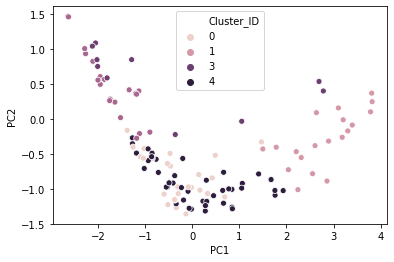

In [70]:
#scatter plot for clusters

sns.scatterplot(x='PC1',y='PC2',hue='Cluster_ID',data=cnt_km)

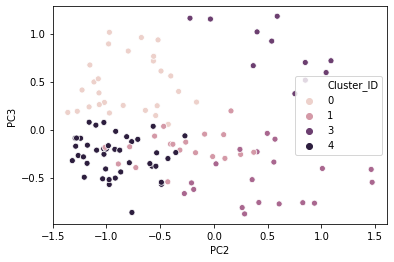

In [71]:
sns.scatterplot(x='PC2',y='PC3',hue='Cluster_ID',data=cnt_km)

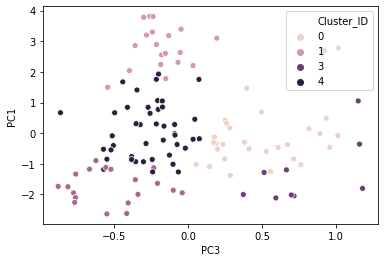

In [72]:
sns.scatterplot(x='PC3',y='PC1',hue='Cluster_ID',data=cnt_km)

In [78]:
#merging the determined cluster clasification with the data given

cnt1=pd.merge(cnt,cnt_km, on='country')
cnt1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,Cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635575,1.472267,-0.549489,2
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459557,-0.675495,0.959355,0
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648597,-1.023437,-0.257430,4
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.334555,-1.271889,0.190564,0
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3.181525,-0.262485,-0.130870,1


In [ ]:
#Removing PC1,PC2 and PC3

cnt1.drop(['PC1','PC2','PC3'], axis=1,inplace=True)

In [90]:
#cluster the countries 
 
Cluster1=cnt1[cnt1['Cluster_ID']==0]['country'].unique()
Cluster2=cnt1[cnt1['Cluster_ID']==1]['country'].unique()
Cluster3=cnt1[cnt1['Cluster_ID']==2]['country'].unique()
Cluster4=cnt1[cnt1['Cluster_ID']==3]['country'].unique()
Cluster5=cnt1[cnt1['Cluster_ID']==4]['country'].unique()

In [96]:
#Print clustered countries

print('Cluster1:',Cluster1)
print('===========================================================================================')
print('Cluster2:',Cluster2)
print('===========================================================================================')
print('Cluster3:',Cluster3)
print('===========================================================================================')
print('Cluster4:',Cluster4)
print('===========================================================================================')
print('Cluster5:',Cluster5)

Cluster1: ['Algeria' 'Armenia' 'Azerbaijan' 'Bahrain' 'Belarus' 'Bolivia' 'Brazil'
 'Chile' 'China' 'Ecuador' 'Egypt' 'Georgia' 'Indonesia' 'Iran' 'Jamaica'
 'Jordan' 'Kyrgyz Republic' 'Libya' 'Malaysia' 'Moldova' 'Nepal' 'Russia'
 'Tajikistan' 'Turkey' 'Ukraine' 'Uzbekistan' 'Vietnam']
Cluster2: ['Australia' 'Austria' 'Bahamas' 'Canada' 'Cyprus' 'Finland' 'France'
 'Germany' 'Iceland' 'Israel' 'Italy' 'Japan' 'Malta' 'New Zealand'
 'Slovenia' 'Spain' 'Sweden' 'United Kingdom' 'United States']
Cluster3: ['Afghanistan' 'Botswana' 'Comoros' 'Eritrea' 'Gambia' 'Kenya' 'Lao'
 'Liberia' 'Madagascar' 'Micronesia, Fed. Sts.' 'Namibia' 'Pakistan'
 'Rwanda' 'Solomon Islands' 'South Africa' 'Tanzania' 'Turkmenistan'
 'Uganda' 'Vanuatu']
Cluster4: ['Congo, Rep.' 'Gabon' 'Ghana' 'Iraq' 'Kazakhstan' 'Kuwait' 'Mauritania'
 'Oman' 'Sudan' 'United Arab Emirates' 'Yemen']
Cluster5: ['Antigua and Barbuda' 'Bangladesh' 'Barbados' 'Belize' 'Bhutan'
 'Bulgaria' 'Cambodia' 'Cape Verde' 'Colombia' 'Croatia' 

# Hierarchical clustering

In [100]:
#import libraries 

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

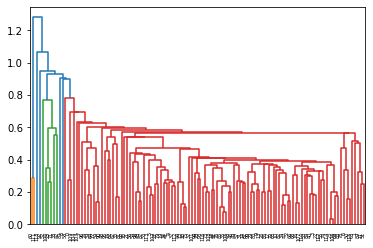

In [104]:
merging =linkage(pc_cnt_scaled,method='single',metric='euclidean')
dendrogram(merging)
plt.show()

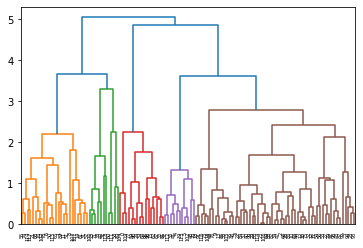

In [105]:
merging =linkage(pc_cnt_scaled,method='complete',metric='euclidean')
dendrogram(merging)
plt.show()

In [107]:
clustercut=pd.Series(cut_tree(merging,n_clusters=5).reshape(-1))

In [121]:
cnt_hc= pd.concat([pc_cnt_1,clustercut],axis=1)
cnt_hc=cnt_hc.rename({0:'Cluster_ID'},axis=1)
cnt_hc

,country,PC1,PC2,PC3,Cluster_ID
0,Afghanistan,-2.635575,1.472267,-0.549489,0
1,Algeria,-0.459557,-0.675495,0.959355,1
2,Antigua and Barbuda,0.648597,-1.023437,-0.257430,2
3,Armenia,-0.334555,-1.271889,0.190564,2
4,Australia,3.181525,-0.262485,-0.130870,3
...,...,...,...,...,...
114,Uruguay,0.454814,-1.098889,0.045829,2
115,Uzbekistan,-1.031922,-0.561378,0.763442,1
116,Vanuatu,-1.175210,-0.275652,-0.667131,2
117,Vietnam,-0.594449,-1.076335,0.528875,1


In [122]:
cnt2=pd.merge(cnt,cnt_hc, on='country')
cnt2.drop(['PC1','PC2','PC3'], axis=1,inplace=True)
cnt2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,2
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3


In [124]:
cnt2['Cluster_ID'].value_counts()

2    57
1    24
0    16
4    11
3    11
Name: Cluster_ID, dtype: int64

In [127]:
#cluster the countries based on dendrogram
 
Cluster1=cnt2[cnt2['Cluster_ID']==0]['country'].unique()
Cluster2=cnt2[cnt2['Cluster_ID']==1]['country'].unique()
Cluster3=cnt2[cnt2['Cluster_ID']==2]['country'].unique()
Cluster4=cnt2[cnt2['Cluster_ID']==3]['country'].unique()
Cluster5=cnt2[cnt2['Cluster_ID']==4]['country'].unique()

In [128]:
#Print clustered countries with dendrogram

print('Cluster1:',Cluster1)
print('===========================================================================================')
print('Cluster2:',Cluster2)
print('===========================================================================================')
print('Cluster3:',Cluster3)
print('===========================================================================================')
print('Cluster4:',Cluster4)
print('===========================================================================================')
print('Cluster5:',Cluster5)

Cluster1: ['Afghanistan' 'Botswana' 'Comoros' 'Eritrea' 'Gambia' 'Kenya' 'Lao'
 'Liberia' 'Madagascar' 'Namibia' 'Pakistan' 'Rwanda' 'Solomon Islands'
 'South Africa' 'Tanzania' 'Uganda']
Cluster2: ['Algeria' 'Azerbaijan' 'Bahrain' 'Belarus' 'Bolivia' 'Brazil' 'Chile'
 'Egypt' 'Indonesia' 'Iran' 'Jamaica' 'Jordan' 'Kyrgyz Republic' 'Libya'
 'Malaysia' 'Moldova' 'Nepal' 'Russia' 'Suriname' 'Tajikistan' 'Turkey'
 'Ukraine' 'Uzbekistan' 'Vietnam']
Cluster3: ['Antigua and Barbuda' 'Armenia' 'Bahamas' 'Bangladesh' 'Barbados'
 'Belize' 'Bhutan' 'Bulgaria' 'Cambodia' 'Cape Verde' 'China' 'Colombia'
 'Croatia' 'Cyprus' 'Czech Republic' 'Dominican Republic' 'Ecuador'
 'El Salvador' 'Estonia' 'Fiji' 'Georgia' 'Greece' 'Grenada' 'Guatemala'
 'Guyana' 'Hungary' 'India' 'Israel' 'Italy' 'Japan' 'Latvia' 'Lithuania'
 'Maldives' 'Mauritius' 'Micronesia, Fed. Sts.' 'Morocco' 'Myanmar'
 'New Zealand' 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Romania' 'Samoa' 'Seychelles' 'Slovak Re